<a href="https://colab.research.google.com/github/fuleabhijit/Dsa/blob/main/End_to_End_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


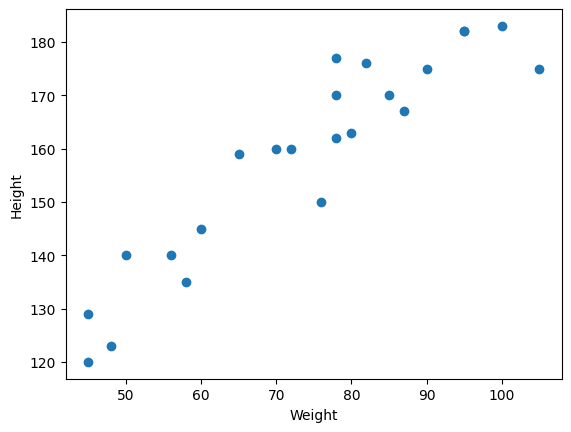

In [ ]:
plt.scatter(df["Weight"],df["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

##divide the dataset into independent and dependent edatures


In [ ]:
X=df[["Weight"]]
y=df["Height"]

##Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [ ]:
X.shape

(23, 1)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((18, 1), (5, 1), (18,), (5,))

## standardize the dataset train independent data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

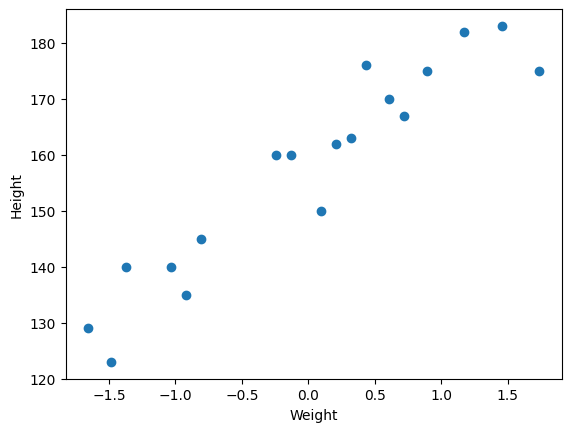

In [ ]:
plt.scatter(X_train,y_train)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [ ]:
##train the model
from sklearn.linear_model import LinearRegression

In [ ]:
regressor=LinearRegression()

In [ ]:
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

[17.03440872]
157.5


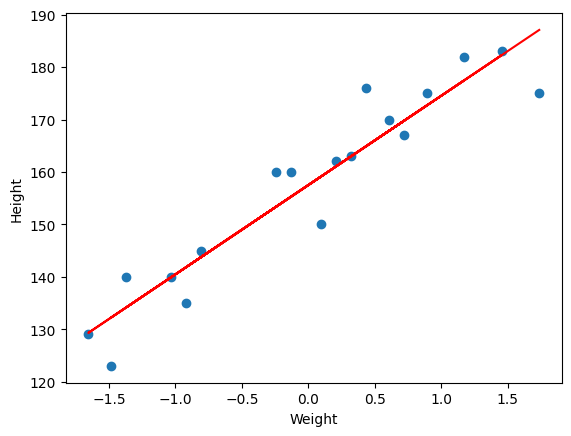

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train), 'r')
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

**prediction of train data**

1 predicited height  output = intercept + coef_ (Weights)

2 y_pred_train = 157.5 + 17.03(X_train)

**prediction of test data**

1 predicited height  output = intercept + coef_ (Weights)

2 y_pred_test = 157.5 + 17.03(X_test)

In [ ]:
y_pred_test=regressor.predict(X_test)

In [ ]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

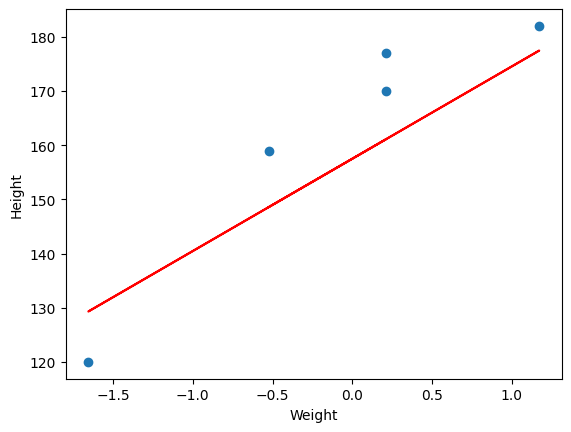

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test), 'r')
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

##performance metrix

##MSE,MAE,RMSE
##R square and adjusted square

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)

In [ ]:
print(mse,mae,rmse)

109.77592599051664 9.822657814519232 10.477400726827081


In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_test)
print(score)

0.776986986042344


##Adjusted R Square

**Adjusted R Square = 1 - [(1-Rsquare)*(n-1)/(n-k-1)]**


where:
r2: The R Square value.
n: The number of observations (data points).
k: The number of predictor variables

In [ ]:
regressor

LinearRegression()

In [ ]:
## new data point weight is 80

scaled_weight = scaler.transform([[80]])
scaled_weight

array([[0.32350772]])

In [ ]:
print("The height prediction for weight 80 KG is :",regressor.predict(scaled_weight))

The height prediction for weight 80 KG is : [163.01076266]


Text(0, 0.5, 'y_pred_test')

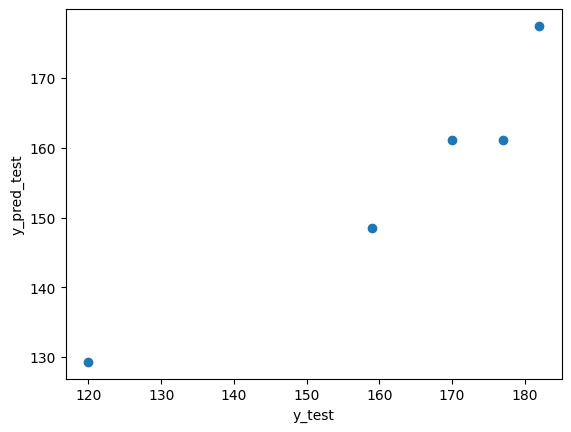

In [37]:
## Assumptions
## plot a catter plot
plt.scatter(y_test,y_pred_test)
plt.xlabel("y_test")
plt.ylabel("y_pred_test")


In [38]:
## Residuals
residuals=y_test-y_pred_test
residuals

,Height
15,15.915329
9,8.915329
0,-9.304156
8,4.543549
17,10.434926


<Axes: xlabel='Height', ylabel='Density'>

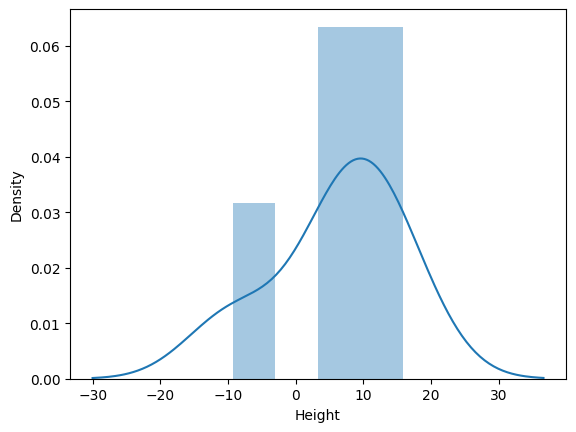

In [39]:
import seaborn as sns
sns.distplot(residuals)